Heart failure clinical records

#student_name =   "Michel Laji"
#student_id =     "mila1958"
#student_background =  "medical"

In [1]:
# Numeric analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
warnings.simplefilter(action='ignore', category=FutureWarning)
# Set the seed of the pseudo randomization to guarantee that results are reproducible between executions
RANDOM_SEED = 2023
np.random.seed(RANDOM_SEED)


In [2]:
df_blobs = pd.read_csv('Kajsa.csv')
data_blobs_X = df_blobs[['ejection_fraction', 'platelets']].values
data_blobs_y = df_blobs['sex'].values


In [3]:
df_blobs.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [4]:
df_blobs.groupby(by= ["sex","ejection_fraction","platelets"]).size()

sex  ejection_fraction  platelets
0    15                 213000.0     1
     17                 271000.0     1
     20                 279000.0     1
                        327000.0     1
                        418000.0     1
                                    ..
1    60                 337000.0     1
                        368000.0     1
                        377000.0     1
                        454000.0     1
     62                 147000.0     1
Length: 280, dtype: int64

In [5]:
# Visualizing some samples in a dataframe for clarification
df_blobs = pd.DataFrame({
                        "ejection_fraction": data_blobs_X[:,0],
                        "platelets": data_blobs_X[:,1],
                        "sex": data_blobs_y
                        })

# Show random 10 samples from the data
df_blobs.sample(10)

,ejection_fraction,platelets,sex
259,50.0,308000.00,1
24,30.0,263358.03,0
148,30.0,225000.00,1
195,45.0,223000.00,1
161,35.0,174000.00,1
156,35.0,277000.00,0
229,25.0,274000.00,0
257,38.0,253000.00,1
149,35.0,228000.00,1
62,35.0,254000.00,1


In [24]:
df_blobs["sexName"] = df_blobs["sex"].replace({1: "Male", 0: "Female"})

In [25]:
df_blobs

,ejection_fraction,platelets,sex,sexName
0,20.0,265000.00,1,Male
1,38.0,263358.03,1,Male
2,20.0,162000.00,1,Male
3,20.0,210000.00,1,Male
4,20.0,327000.00,0,Female
...,...,...,...,...
294,38.0,155000.00,1,Male
295,38.0,270000.00,0,Female
296,60.0,742000.00,0,Female
297,38.0,140000.00,1,Male


In [8]:
def visualize_dataset_with_target_class(title=""):
    plt.scatter(x=df_blobs.loc[df_blobs.sex == 1, "platelets"], y=df_blobs.loc[df_blobs.sex == 1, "ejection_fraction"], c="blue", label="Male")
    plt.scatter(x=df_blobs.loc[df_blobs.sex == 0, "platelets"], y=df_blobs.loc[df_blobs.sex == 0, "ejection_fraction"], c="red", label="Female")
    plt.xlabel("Platelets")
    plt.ylabel("Ejection Fraction")
    plt.title(title)
    plt.grid(True)
    plt.legend()
    return plt.show()

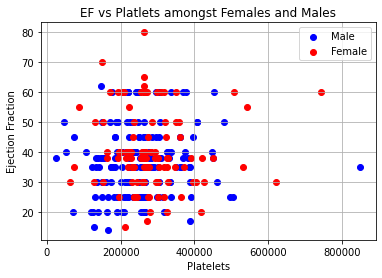

In [9]:
visualize_dataset_with_target_class(title="EF vs Platlets amongst Females and Males")

In [10]:
df_blobs.isnull().sum()

ejection_fraction    0
platelets            0
sex                  0
dtype: int64

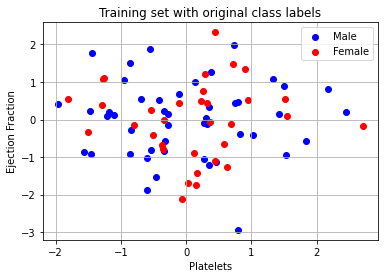

In [11]:
np.random.seed(42)
N_SAMPLES = 100
data_blobs_X = np.random.normal(size=(N_SAMPLES, 2))
data_blobs_y = np.random.binomial(n=1, p=0.5, size=N_SAMPLES)
data_blobs_y[data_blobs_y == 0] = -1

def visualize_dataset_with_target_class(X, y, title=""):
    male_X = X[y == 1]
    female_X = X[y == -1]
    
    plt.scatter(x=male_X[:,1], y=male_X[:,0], c="blue", label="Male")
    plt.scatter(x=female_X[:,1], y=female_X[:,0], c="red", label="Female")
    
    plt.xlabel("Platelets")
    plt.ylabel("Ejection Fraction")
    plt.title(title)
    plt.grid(True)
    plt.legend()
    return plt.show()
scaler = StandardScaler()
scaler.fit(data_blobs_X)
data_blobs_X_scaled = scaler.transform(data_blobs_X)
df_blobs_scaled = pd.DataFrame(data_blobs_X_scaled, columns=["ejection_fraction", "platelets"])
df_blobs_scaled["sex"] = data_blobs_y

X_train, X_test, y_train, y_test = train_test_split(df_blobs_scaled.drop("sex", axis=1), 
                                                    df_blobs_scaled["sex"], 
                                                    test_size=0.2, 
                                                    random_state=42)

visualize_dataset_with_target_class(X_train.values, y_train.values, title="Training set with original class labels")

In [12]:
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
dblobs_y_predicted = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of decision tree classifier on test data:", accuracy, "and the class labels in the test set are:", dblobs_y_predicted)

Accuracy of decision tree classifier on test data: 0.4 and the class labels in the test set are: [ 1 -1  1  1 -1  1  1  1  1 -1  1 -1  1  1  1 -1 -1  1 -1  1]


In [13]:
def visualize_and_compare_classifications(X, real_y, predicted_y, title=""):
    """
    Input:
        X: (np.array[N,2]) - The dataset to visualize (only 2 features)
        real_y: (np.array[N,1]) - Real class labels from X
        predicted_y: (np.array[N,1]) - Predicted class labels from X
    Returns:
        A plot with two axes showing the real and the predicted labels
    """

    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    
    # First plot contains real class labels
    ax = axes[0]
    male_X = X[real_y == 1]
    female_X = X[real_y == -1]
    ax.scatter(x=male_X[:,1], y=male_X[:,0], c="blue", label="Male")
    ax.scatter(x=female_X[:,1], y=female_X[:,0], c="red", label="Female")
    ax.set(xlabel="Platelets", ylabel="Ejection Fraction", title="Real labels")
    ax.grid(True)
    ax.legend()

    # Second plot contains predicted class labels
    ax = axes[1]
    male_X = X[predicted_y == 1]
    female_X = X[predicted_y == -1]
    ax.scatter(x=male_X[:,1], y=male_X[:,0], c="blue", label="Male")
    ax.scatter(x=female_X[:,1], y=female_X[:,0], c="red", label="Female")
    ax.set(xlabel="Platelets", ylabel="Ejection Fraction", title="Predicted labels")
    ax.grid(True)
    ax.legend()

    if title != "":
        plt.suptitle(title)

    return plt.show()


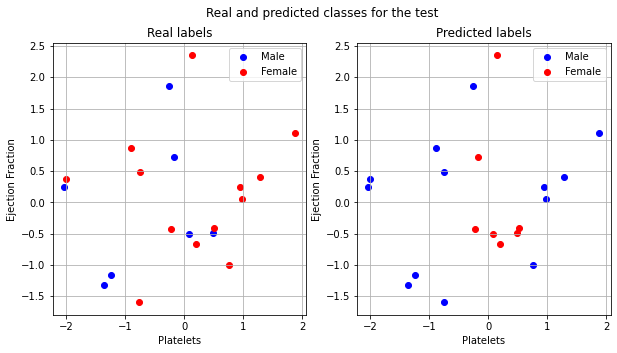

In [14]:
visualize_and_compare_classifications(X_test.values, y_test.values, y_pred, title="Real and predicted classes for the test")

In [15]:
def visualize_and_compare_decision_boundaries(X, real_y, classifier, title="", step=0.005):
    """
    Function based on the example from 
    https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
    
    Input:
        X: (np.array[N,2]) - The dataset to visualize (only 2 features)
        real_y: (np.array[N,1]) - Real class labels from X
        classifier: (sklearn-object) - Object that classifies the data
    Returns:
        A plot with two axes showing the decision boundaries
    """
    real_y = np.where(real_y == 1, -1, 1)
    # Plotting decision regions
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # We are creating a 2D grid of test data to be able to show the decision boundaries
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

    # And we apply the classifier to each sample in the 2D grid to see what would the prediction
    # be at each specific point of the space
    Z = dt_clf.predict(np.column_stack([xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    # Plot contains real class labels and 
    # the decision boundary created by the classifier
    fig, ax = plt.subplots(figsize=(8,6))
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(x = X[:,0], y = X[:,1], c=real_y, s=30, edgecolor="k", label="True class labels")
    ax.set(xlabel="Platelets", ylabel="Ejection Fraction")
    ax.grid(True); ax.legend()

    if title == "":
        plt.suptitle("True class labels and predicted decision boundary")
    else:
        plt.suptitle(title)

    return plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


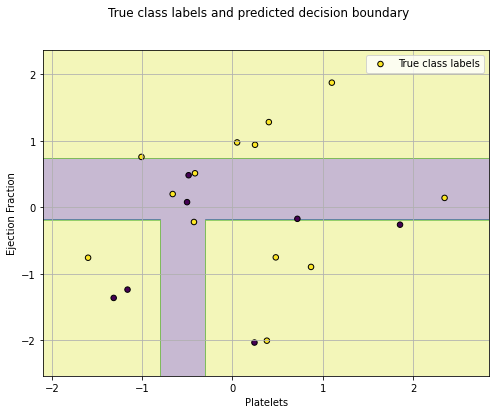

In [16]:
visualize_and_compare_decision_boundaries(X_test.values, y_test.values, y_pred)

[Text(0.4230769230769231, 0.875, 'x[1] <= -0.189\ngini = 0.485\nsamples = 80\nvalue = [33, 47]'),
 Text(0.15384615384615385, 0.625, 'x[0] <= -0.798\ngini = 0.431\nsamples = 35\nvalue = [11, 24]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.23076923076923078, 0.375, 'x[0] <= -0.296\ngini = 0.483\nsamples = 27\nvalue = [11, 16]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.434\nsamples = 22\nvalue = [7, 15]'),
 Text(0.6923076923076923, 0.625, 'x[1] <= 0.73\ngini = 0.5\nsamples = 45\nvalue = [22, 23]'),
 Text(0.5384615384615384, 0.375, 'x[0] <= -1.239\ngini = 0.466\nsamples = 27\nvalue = [17, 10]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.496\nsamples = 22\nvalue = [12, 10]'),
 Text(0.8461538461538461, 0.375, 'x[1] <= 2.574\ngini = 0.401\nsamples = 18\nvalue = [5, 13]'),
 Text(0.7692307692

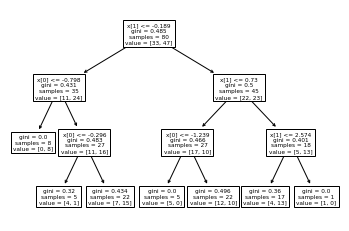

In [17]:
plot_tree(dt_clf)

In [18]:
scaler = MinMaxScaler()

data_norm_blobs_X = scaler.fit_transform(data_blobs_X)

dblobs_norm_X_train, dblobs_norm_X_test, dblobs_y_train, dblobs_y_test = train_test_split(data_norm_blobs_X, 
                                                                                data_blobs_y,                                                                               test_size=0.3,
                                                                                random_state=RANDOM_SEED)
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(dblobs_norm_X_train, dblobs_y_train)
dblobs_y_predicted = knn_classifier.predict(dblobs_norm_X_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


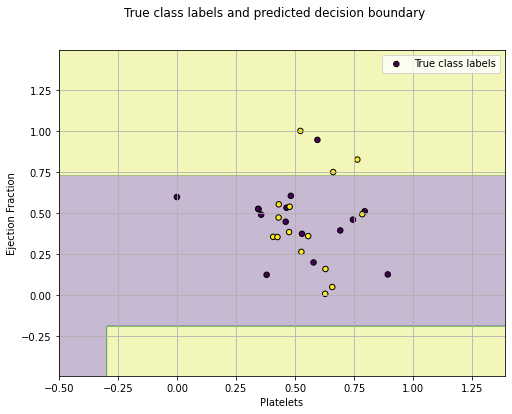

In [19]:
visualize_and_compare_decision_boundaries(dblobs_norm_X_test, dblobs_y_test, knn_classifier)

In [20]:
rf_classifier = RandomForestClassifier(n_estimators=10, max_depth=3, criterion="entropy")
rf_classifier.fit(X_train, y_train)
y_predicted = rf_classifier.predict(X_test)
print("According to the RF classifier, the class labels in the test set are: ", y_predicted)


According to the RF classifier, the class labels in the test set are:  [ 1 -1  1  1 -1  1  1  1  1  1 -1 -1  1  1  1 -1 -1  1 -1  1]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


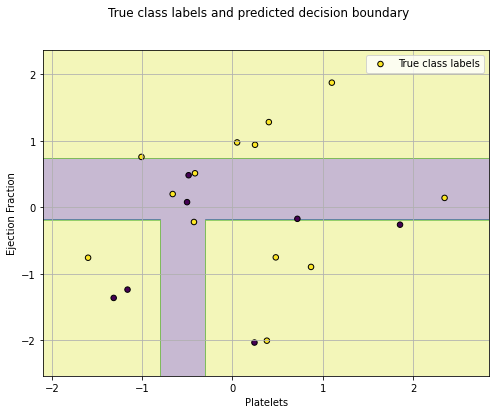

In [21]:
visualize_and_compare_decision_boundaries(X_test.values, y_test, rf_classifier)